In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv("../../02_Data/Extra/Idrid_mapping.csv")
df.sample(5)

,sno,Image name,Risk of macular edema,Retinopathy grade new,split
463,463,IDRiD_331,0,0,train
235,235,IDRiD_175,0,0,test
20,20,IDRiD_455,1,2,train
366,366,IDRiD_475,2,3,train
438,438,IDRiD_396,0,0,train


In [3]:
# dropping sno column
df.drop("sno", axis=1, inplace=True)

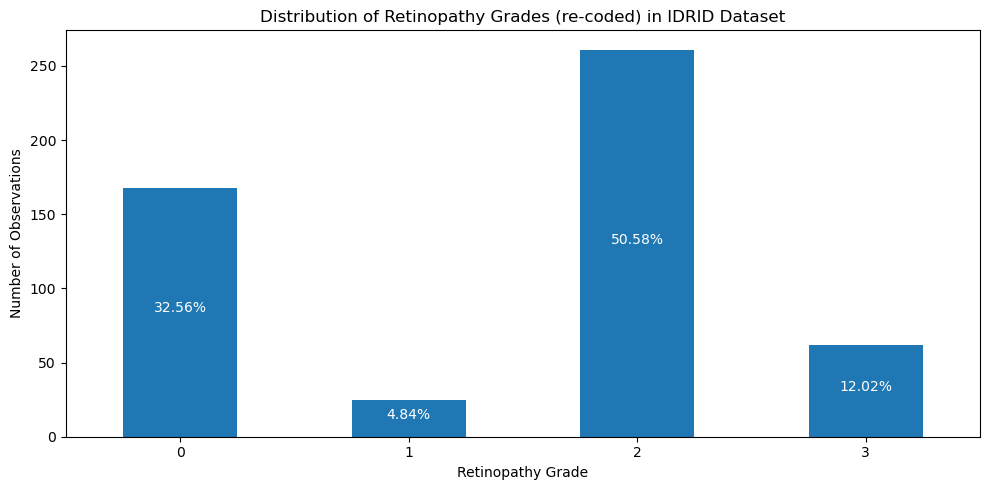

In [4]:
# plotting distribution of the target variable w.r.t the department in original dataset and test dataset side by side
plt.figure(figsize=(10, 5))
df.groupby(["Retinopathy grade new"]).size().sort_index().plot(kind="bar", stacked=True)
# adding % values within the bars
# adding % in the bars
for i in range(4):
    plt.text(
        i,
        df["Retinopathy grade new"].value_counts().sort_index().values[i] // 2,
        str(
            round(
                df["Retinopathy grade new"]
                .value_counts(normalize=True)
                .sort_index()
                .values[i]
                * 100,
                2,
            )
        )
        + "%",
        ha="center",
        color="white",
    )
plt.title("Distribution of Retinopathy Grades (re-coded) in IDRID Dataset")
plt.ylabel("Number of Observations")
plt.xlabel("Retinopathy Grade")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

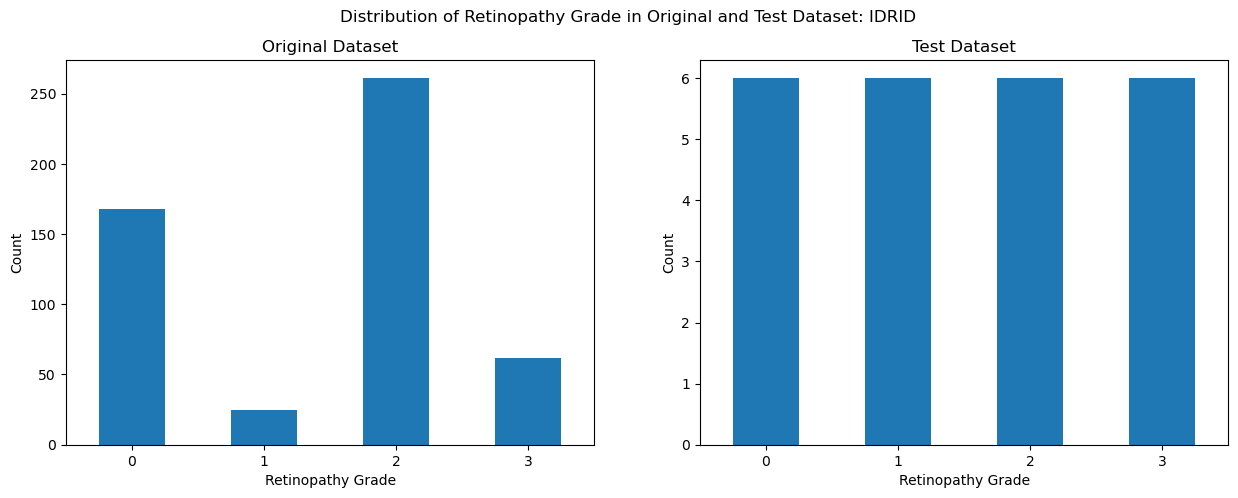

In [9]:
# plotting distribution of target variable side by side for original and test dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df["Retinopathy grade new"].value_counts().sort_index().plot(kind="bar", ax=ax[0])
ax[0].set_title("Original Dataset")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Retinopathy Grade")
ax[0].xaxis.set_tick_params(rotation=0)

df[df["split"] == "test"]["Retinopathy grade new"].value_counts().sort_index().plot(
    kind="bar", ax=ax[1]
)
ax[1].set_title("Test Dataset")
ax[1].set_xlabel("Retinopathy Grade")
ax[1].xaxis.set_tick_params(rotation=0)
ax[1].set_ylabel("Count")

# adding common title
plt.suptitle("Distribution of Retinopathy Grade in Original and Test Dataset: IDRID")
plt.show()